In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2025-02-13T12:44:34.175752-05:00

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 8.10.0

Compiler    : Clang 16.0.0 (clang-1600.0.26.4)
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 20
Architecture: 64bit



In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf
#from xgboost.callback import TensorBoardCallback

from sklearn.metrics import roc_auc_score

In [4]:
%watermark --iversions

numpy  : 1.26.4
xgboost: 2.1.2
pandas : 2.2.3



In [5]:
X_num_train = np.load('../input/higgs_small_roc/X_num_train.npy')
X_num_val = np.load('../input/higgs_small_roc/X_num_val.npy')
X_num_test = np.load('../input/higgs_small_roc/X_num_test.npy')

y_train = np.load('../input/higgs_small_roc/y_train.npy')
y_val = np.load('../input/higgs_small_roc/y_val.npy')
y_test = np.load('../input/higgs_small_roc/y_test.npy')

In [6]:
X_num_train.shape

(62751, 28)

In [7]:
# Enable interactive plotting
plt.ion()

In [14]:
class LivePlotCallback(TrainingCallback):
    def __init__(self):
        self.train_metrics = []
        self.eval_metrics = []
        self.fig, self.ax = plt.subplots()

    def after_iteration(self, model, epoch, evals_log):
        """
        This method is called after each training iteration.
        
        Parameters:
          model: The Booster model.
          epoch: The current boosting round.
          evals_log: A dict containing evaluation results. For example:
                     {'train': {'error': [0.1, 0.05, ...]},
                      'eval': {'error': [0.15, 0.07, ...]}}
        """
        # Extract the latest evaluation results; adjust metric name if needed.
        train_error = evals_log.get('train', {}).get('error', [None])[-1]
        eval_error = evals_log.get('eval', {}).get('error', [None])[-1]
        
        self.train_metrics.append(train_error)
        self.eval_metrics.append(eval_error)
        
        # Clear the axes and re-plot
        self.ax.cla()
        self.ax.plot(self.train_metrics, label='Train')
        self.ax.plot(self.eval_metrics, label='Eval')
        self.ax.set_xlabel('Iteration')
        self.ax.set_ylabel('Error')
        self.ax.legend()
        
        plt.draw()
        plt.pause(0.001)  # Short pause to update the figure
        
        # Returning False means "continue training"
        return False

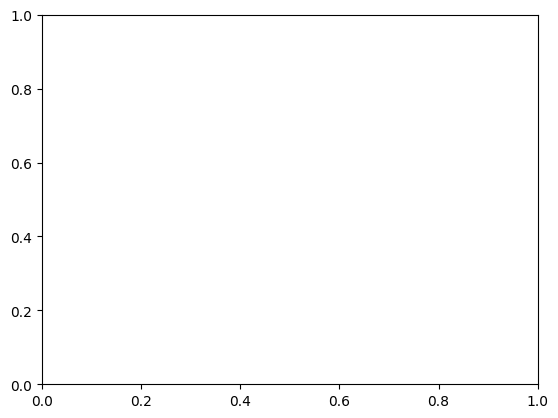

In [15]:
# Create an instance of the callback
live_plot = LivePlotCallback()


In [16]:
# Prepare your data
dtrain = xgb.DMatrix(X_num_train, label=y_train)
deval  = xgb.DMatrix(X_num_val, label=y_val)

In [19]:
# Define your parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
    # add other parameters as needed
}

In [20]:

# Start training with evaluation sets and the custom callback.
# Here, we pass two evaluation sets: one for training and one for evaluation.
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (deval, 'eval')],
    callbacks=[live_plot]
)

<Figure size 640x480 with 0 Axes>

[0]	train-auc:0.75093	eval-auc:0.74206


<Figure size 640x480 with 0 Axes>

[1]	train-auc:0.76397	eval-auc:0.75276


<Figure size 640x480 with 0 Axes>

[2]	train-auc:0.77448	eval-auc:0.76135


<Figure size 640x480 with 0 Axes>

[3]	train-auc:0.78444	eval-auc:0.76817


<Figure size 640x480 with 0 Axes>

[4]	train-auc:0.79149	eval-auc:0.77392


<Figure size 640x480 with 0 Axes>

[5]	train-auc:0.79702	eval-auc:0.77792


<Figure size 640x480 with 0 Axes>

[6]	train-auc:0.80272	eval-auc:0.78143


<Figure size 640x480 with 0 Axes>

[7]	train-auc:0.80669	eval-auc:0.78363


<Figure size 640x480 with 0 Axes>

[8]	train-auc:0.80989	eval-auc:0.78505


<Figure size 640x480 with 0 Axes>

[9]	train-auc:0.81252	eval-auc:0.78640


<Figure size 640x480 with 0 Axes>

[10]	train-auc:0.81462	eval-auc:0.78763


<Figure size 640x480 with 0 Axes>

[11]	train-auc:0.81739	eval-auc:0.78860


<Figure size 640x480 with 0 Axes>

[12]	train-auc:0.81987	eval-auc:0.78911


<Figure size 640x480 with 0 Axes>

[13]	train-auc:0.82197	eval-auc:0.78985


<Figure size 640x480 with 0 Axes>

[14]	train-auc:0.82324	eval-auc:0.79043


<Figure size 640x480 with 0 Axes>

[15]	train-auc:0.82571	eval-auc:0.79129


<Figure size 640x480 with 0 Axes>

[16]	train-auc:0.82717	eval-auc:0.79166


<Figure size 640x480 with 0 Axes>

[17]	train-auc:0.82801	eval-auc:0.79168


<Figure size 640x480 with 0 Axes>

[18]	train-auc:0.83042	eval-auc:0.79217


<Figure size 640x480 with 0 Axes>

[19]	train-auc:0.83238	eval-auc:0.79283


<Figure size 640x480 with 0 Axes>

[20]	train-auc:0.83374	eval-auc:0.79393


<Figure size 640x480 with 0 Axes>

[21]	train-auc:0.83542	eval-auc:0.79421


<Figure size 640x480 with 0 Axes>

[22]	train-auc:0.83606	eval-auc:0.79423


<Figure size 640x480 with 0 Axes>

[23]	train-auc:0.83756	eval-auc:0.79432


<Figure size 640x480 with 0 Axes>

[24]	train-auc:0.83936	eval-auc:0.79478


<Figure size 640x480 with 0 Axes>

[25]	train-auc:0.84020	eval-auc:0.79525


<Figure size 640x480 with 0 Axes>

[26]	train-auc:0.84158	eval-auc:0.79568


<Figure size 640x480 with 0 Axes>

[27]	train-auc:0.84298	eval-auc:0.79562


<Figure size 640x480 with 0 Axes>

[28]	train-auc:0.84389	eval-auc:0.79561


<Figure size 640x480 with 0 Axes>

[29]	train-auc:0.84581	eval-auc:0.79598


<Figure size 640x480 with 0 Axes>

[30]	train-auc:0.84671	eval-auc:0.79604


<Figure size 640x480 with 0 Axes>

[31]	train-auc:0.84766	eval-auc:0.79582


<Figure size 640x480 with 0 Axes>

[32]	train-auc:0.84924	eval-auc:0.79583


<Figure size 640x480 with 0 Axes>

[33]	train-auc:0.85089	eval-auc:0.79641


<Figure size 640x480 with 0 Axes>

[34]	train-auc:0.85244	eval-auc:0.79666


<Figure size 640x480 with 0 Axes>

[35]	train-auc:0.85382	eval-auc:0.79655


<Figure size 640x480 with 0 Axes>

[36]	train-auc:0.85501	eval-auc:0.79681


<Figure size 640x480 with 0 Axes>

[37]	train-auc:0.85661	eval-auc:0.79724


<Figure size 640x480 with 0 Axes>

[38]	train-auc:0.85789	eval-auc:0.79717


<Figure size 640x480 with 0 Axes>

[39]	train-auc:0.85855	eval-auc:0.79718


<Figure size 640x480 with 0 Axes>

[40]	train-auc:0.85997	eval-auc:0.79742


<Figure size 640x480 with 0 Axes>

[41]	train-auc:0.86050	eval-auc:0.79756


<Figure size 640x480 with 0 Axes>

[42]	train-auc:0.86184	eval-auc:0.79769


<Figure size 640x480 with 0 Axes>

[43]	train-auc:0.86300	eval-auc:0.79737


<Figure size 640x480 with 0 Axes>

[44]	train-auc:0.86387	eval-auc:0.79746


<Figure size 640x480 with 0 Axes>

[45]	train-auc:0.86493	eval-auc:0.79731


<Figure size 640x480 with 0 Axes>

[46]	train-auc:0.86607	eval-auc:0.79776


<Figure size 640x480 with 0 Axes>

[47]	train-auc:0.86735	eval-auc:0.79793


<Figure size 640x480 with 0 Axes>

[48]	train-auc:0.86855	eval-auc:0.79807


<Figure size 640x480 with 0 Axes>

[49]	train-auc:0.86955	eval-auc:0.79843


<Figure size 640x480 with 0 Axes>

[50]	train-auc:0.87040	eval-auc:0.79838


<Figure size 640x480 with 0 Axes>

[51]	train-auc:0.87163	eval-auc:0.79851


<Figure size 640x480 with 0 Axes>

[52]	train-auc:0.87322	eval-auc:0.79853


<Figure size 640x480 with 0 Axes>

[53]	train-auc:0.87411	eval-auc:0.79852


<Figure size 640x480 with 0 Axes>

[54]	train-auc:0.87535	eval-auc:0.79855


<Figure size 640x480 with 0 Axes>

[55]	train-auc:0.87668	eval-auc:0.79820


<Figure size 640x480 with 0 Axes>

[56]	train-auc:0.87777	eval-auc:0.79822


<Figure size 640x480 with 0 Axes>

[57]	train-auc:0.87882	eval-auc:0.79810


<Figure size 640x480 with 0 Axes>

[58]	train-auc:0.87997	eval-auc:0.79807


<Figure size 640x480 with 0 Axes>

[59]	train-auc:0.88039	eval-auc:0.79811


<Figure size 640x480 with 0 Axes>

[60]	train-auc:0.88147	eval-auc:0.79804


<Figure size 640x480 with 0 Axes>

[61]	train-auc:0.88275	eval-auc:0.79820


<Figure size 640x480 with 0 Axes>

[62]	train-auc:0.88349	eval-auc:0.79827


<Figure size 640x480 with 0 Axes>

[63]	train-auc:0.88410	eval-auc:0.79815


<Figure size 640x480 with 0 Axes>

[64]	train-auc:0.88531	eval-auc:0.79815


<Figure size 640x480 with 0 Axes>

[65]	train-auc:0.88636	eval-auc:0.79823


<Figure size 640x480 with 0 Axes>

[66]	train-auc:0.88757	eval-auc:0.79820


<Figure size 640x480 with 0 Axes>

[67]	train-auc:0.88855	eval-auc:0.79813


<Figure size 640x480 with 0 Axes>

[68]	train-auc:0.88965	eval-auc:0.79812


<Figure size 640x480 with 0 Axes>

[69]	train-auc:0.89027	eval-auc:0.79820


<Figure size 640x480 with 0 Axes>

[70]	train-auc:0.89075	eval-auc:0.79831


<Figure size 640x480 with 0 Axes>

[71]	train-auc:0.89136	eval-auc:0.79829


<Figure size 640x480 with 0 Axes>

[72]	train-auc:0.89240	eval-auc:0.79814


<Figure size 640x480 with 0 Axes>

[73]	train-auc:0.89302	eval-auc:0.79833


<Figure size 640x480 with 0 Axes>

[74]	train-auc:0.89379	eval-auc:0.79816


<Figure size 640x480 with 0 Axes>

[75]	train-auc:0.89493	eval-auc:0.79838


<Figure size 640x480 with 0 Axes>

[76]	train-auc:0.89626	eval-auc:0.79812


<Figure size 640x480 with 0 Axes>

[77]	train-auc:0.89734	eval-auc:0.79843


<Figure size 640x480 with 0 Axes>

[78]	train-auc:0.89828	eval-auc:0.79823


<Figure size 640x480 with 0 Axes>

[79]	train-auc:0.89912	eval-auc:0.79814


<Figure size 640x480 with 0 Axes>

[80]	train-auc:0.90012	eval-auc:0.79792


<Figure size 640x480 with 0 Axes>

[81]	train-auc:0.90065	eval-auc:0.79800


<Figure size 640x480 with 0 Axes>

[82]	train-auc:0.90179	eval-auc:0.79802


<Figure size 640x480 with 0 Axes>

[83]	train-auc:0.90245	eval-auc:0.79809


<Figure size 640x480 with 0 Axes>

[84]	train-auc:0.90311	eval-auc:0.79818


<Figure size 640x480 with 0 Axes>

[85]	train-auc:0.90395	eval-auc:0.79812


<Figure size 640x480 with 0 Axes>

[86]	train-auc:0.90486	eval-auc:0.79791


<Figure size 640x480 with 0 Axes>

[87]	train-auc:0.90554	eval-auc:0.79783


<Figure size 640x480 with 0 Axes>

[88]	train-auc:0.90616	eval-auc:0.79764


<Figure size 640x480 with 0 Axes>

[89]	train-auc:0.90692	eval-auc:0.79788


<Figure size 640x480 with 0 Axes>

[90]	train-auc:0.90748	eval-auc:0.79801


<Figure size 640x480 with 0 Axes>

[91]	train-auc:0.90858	eval-auc:0.79786


<Figure size 640x480 with 0 Axes>

[92]	train-auc:0.90953	eval-auc:0.79774


<Figure size 640x480 with 0 Axes>

[93]	train-auc:0.91066	eval-auc:0.79759


<Figure size 640x480 with 0 Axes>

[94]	train-auc:0.91139	eval-auc:0.79761


<Figure size 640x480 with 0 Axes>

[95]	train-auc:0.91198	eval-auc:0.79754


<Figure size 640x480 with 0 Axes>

[96]	train-auc:0.91237	eval-auc:0.79742


<Figure size 640x480 with 0 Axes>

[97]	train-auc:0.91328	eval-auc:0.79747


<Figure size 640x480 with 0 Axes>

[98]	train-auc:0.91392	eval-auc:0.79765


<Figure size 640x480 with 0 Axes>

[99]	train-auc:0.91475	eval-auc:0.79757


In [21]:
# Optionally, turn off interactive mode and show the final plot
plt.ioff()
plt.show()

In [11]:
roc_auc_score(y_val, val_preds)

0.798704350756605

In [12]:
roc_auc_score(y_test, test_preds)

0.7927676998844502